# Maier dataset

In [1]:
from model.graph_mcmc import Graph_MCMC

In [2]:
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

In [3]:
graph = Graph_MCMC()
graph.read_from_ns("facebook_friends")
graph.convert_props_to_flags()
graph.add_ego_node()


In [4]:
graph.filter_out_low_degree(min_degree=2)

In [5]:
graph.print_info()

Graph with N=349 nodes, E=2336 edges and D=32 vertex features for training


In [6]:
vertices = graph.get_vertex_list()
degrees = graph.G.get_total_degrees(vertices)
print("Min degree: " + str(min(degrees)))

Min degree: 2


In [7]:
graph.partition(B_min=4, B_max=20)

Performing inference...
    B: 12 <- 20    shrinking 20 -> 15
    B: 12 <- 20    B=15  niter:     1  count:    0  breaks:  0  min_S: 5200.7400  max_S: 5204.8865  S: 5200.7400  ΔS:     -4.14645  moves:     4 
    B: 12 <- 20    B=15  niter:     2  count:    0  breaks:  0  min_S: 5199.7234  max_S: 5204.8865  S: 5199.7234  ΔS:     -1.01667  moves:     2 
    B: 12 <- 20    B=15  niter:     3  count:    1  breaks:  1  min_S: 5199.7234  max_S: 5204.8865  S: 5199.7234  ΔS:      0.00000  moves:     0 
    B: 12 <- 20    shrinking 15 -> 12
    B: 12 <- 20    B=12  niter:     1  count:    0  breaks:  0  min_S: 5291.2789  max_S: 5293.6296  S: 5291.2789  ΔS:     -2.35075  moves:     3 
    B: 12 <- 20    B=12  niter:     2  count:    0  breaks:  0  min_S: 5285.4440  max_S: 5293.6296  S: 5285.4440  ΔS:     -5.83487  moves:     9 
    B: 12 <- 20    B=12  niter:     3  count:    1  breaks:  1  min_S: 5285.4440  max_S: 5293.6296  S: 5285.3572  ΔS:   -0.0867676  moves:     2 
Current bracket: (4, 12,

<VertexPropertyMap object with value type 'int32_t', for Graph 0x7f5cc8fa2190, at 0x7f5c589668b0>

Drawing block adjacency matrix $e_{rs}$


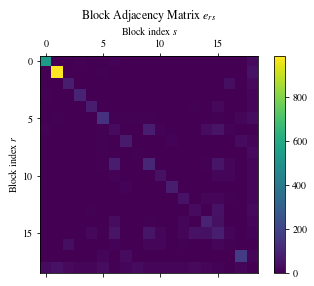

In [8]:
graph.plot_matrix()

In [9]:
graph.mcmc(num_iter=1000, verbose=False)

100%|██████████| 1000/1000 [00:00<00:00, 1464.11it/s]


1.9315130878360176

Drawing soft partition


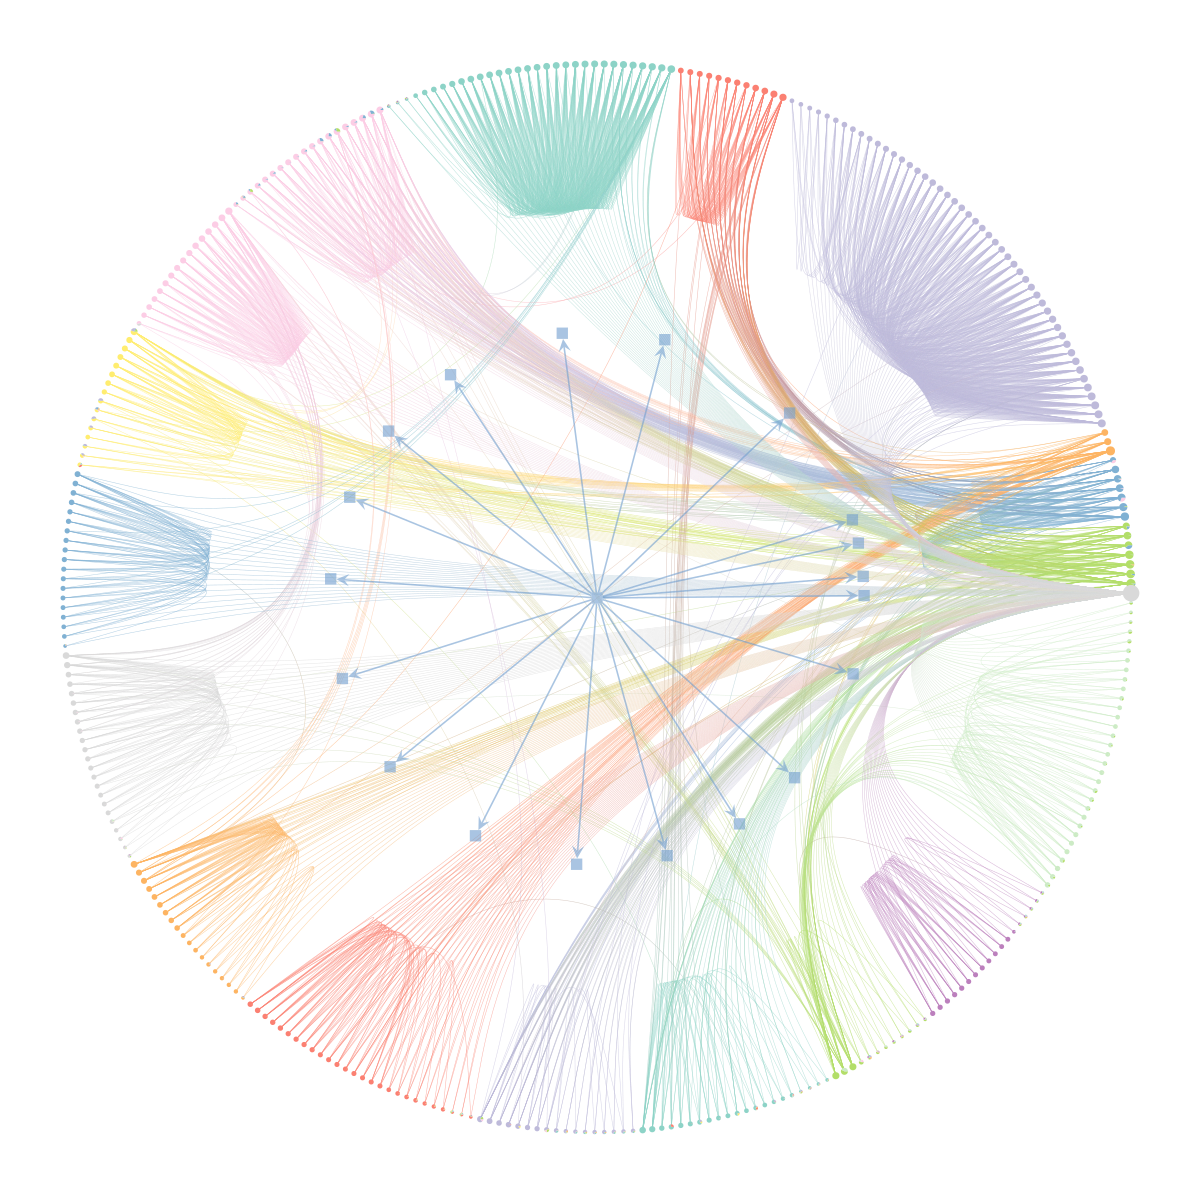

In [11]:
graph.draw()

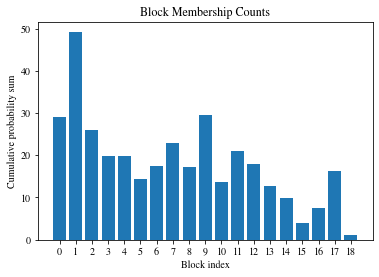

In [12]:
graph.plot_posterior_props()

## Train classifier

In [23]:
classifier = graph.sample_classifier_mala(10000, step_scaling=0.2, verbose=True)

100%|██████████| 10000/10000 [00:10<00:00, 914.89it/s]Sample accept ratio: 77.96%
Train. set accuracy: 40.114613180515754%



## Interpret results

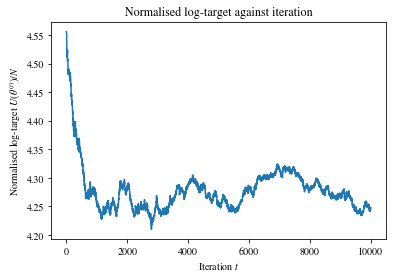

4.27840432480082

In [24]:
classifier.plot_U()

In [15]:
classifier.thin_samples()

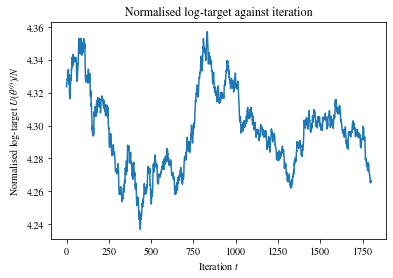

4.2970651970982

In [16]:
classifier.plot_U()

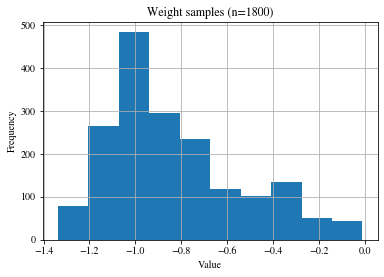

In [17]:
classifier.plot_sample_histogram()

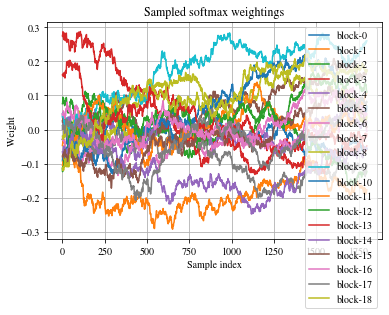

In [18]:
classifier.plot_sample_history()

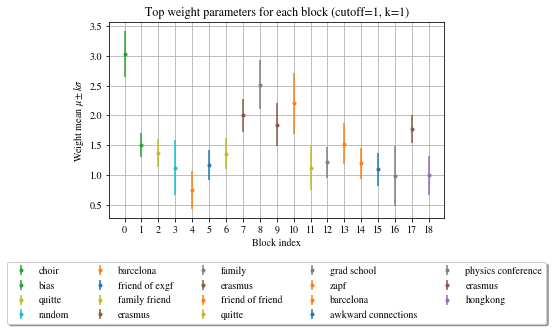

In [19]:
names = list(graph.get_feature_names())
classifier.plot_block_principal_dims(names, cutoff=1, legend=True)

Discarded 22 features


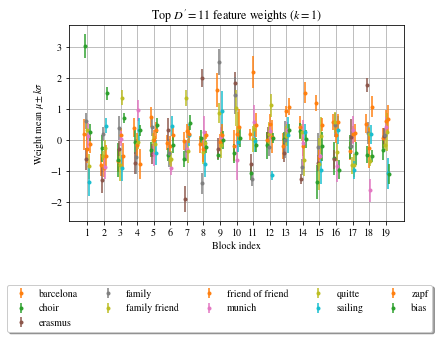

[1, 2, 5, 7, 8, 11, 16, 18, 29, 31]

In [20]:
names = list(graph.get_feature_names())
classifier.plot_sampled_weights(names, std_dev_multiplier=1, null_space=1, legend=True)